In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Path to the directory containing the CSV files
csv_directory = r'C:\Users\rdobe\OneDrive\Documents\Stack Overflow'

# Dictionary to store DataFrames
dataframes = {}

# List all CSV files in the directory
csv_files = os.listdir(csv_directory)

# Iterate through each CSV file and load into a DataFrame
for csv_file in csv_files:
    # Check if the file is a CSV file
    if csv_file.endswith('.csv'):
        # Construct the full path to the CSV file
        csv_path = os.path.join(csv_directory, csv_file)
        
        # Load CSV into DataFrame
        df = pd.read_csv(csv_path)
        
        # Store DataFrame in the dictionary with filename as key
        dataframes[csv_file] = df


In [3]:
#give each file a df name

filename_to_access = 'survey_results_public_2019.csv'

if filename_to_access in dataframes:
    df_19 = dataframes[filename_to_access]

filename_to_access = 'survey_results_public_2020.csv'

if filename_to_access in dataframes:
    df_20 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2021.csv'

if filename_to_access in dataframes:
    df_21 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2022.csv'

if filename_to_access in dataframes:
    df_22 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2023.csv'

if filename_to_access in dataframes:
    df_23 = dataframes[filename_to_access]

In [4]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)

# Display the DataFrame
df_19.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

___
We will check for correlations between categorical and numerical variables, namely job satisfaction and others. For this anaylsis we will start with Survey 2019. Steps:

1. Find correlation technique / method to compare categorical variables with other categorical and numerical variables
2. Explore the following factors :
   * Categorical: Remote work option, office environment / office culture, management influence etc. 
   * Numerical: annual salary/compensation, work-load etc.
3. Analyze results and see if any of these variables repeats in consecutive surveys
___

In [5]:
#Locate the columns we want to explore

df_19_clean = df_19[['JobSat', 'Country', 'WorkChallenge', 'WorkLoc', 'Employment', 'DevType', 'MgrIdiot','ConvertedComp','WorkWeekHrs','YearsCode']]

df_19_clean

,JobSat,Country,WorkChallenge,WorkLoc,Employment,DevType,MgrIdiot,ConvertedComp,WorkWeekHrs,YearsCode
0,NaN,United Kingdom,NaN,NaN,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,4
1,NaN,Bosnia and Herzegovina,NaN,NaN,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,NaN,NaN
2,Slightly satisfied,Thailand,Distracting work environment;Inadequate access...,Home,Employed full-time,"Designer;Developer, back-end;Developer, front-...",Not at all confident,8820.0,40.0,3
3,Slightly satisfied,United States,NaN,Home,Employed full-time,"Developer, full-stack",Very confident,61000.0,80.0,3
4,Slightly dissatisfied,Ukraine,Being tasked with non-development work;Inadequ...,Office,Employed full-time,"Academic researcher;Developer, desktop or ente...",Somewhat confident,NaN,55.0,16
...,...,...,...,...,...,...,...,...,...,...
88878,NaN,Canada,NaN,NaN,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN
88879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN
88881,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN


___
**Data wrangling:**

* WorkChallenge needs to be split
* Employment needs to have valid values, not unemployed and study
* DevType needs to be split
* ConvertedComp needs to be lose outliers
* WorkWeekHrs need to lose values higher than 84 (12x7)
* Rename MgrIdiot
* Remove NaN values
___

In [6]:
df_19_clean = df_19_clean.rename(columns={'MgrIdiot': 'Manager_competency'})
df_19_clean

,JobSat,Country,WorkChallenge,WorkLoc,Employment,DevType,Manager_competency,ConvertedComp,WorkWeekHrs,YearsCode
0,NaN,United Kingdom,NaN,NaN,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,4
1,NaN,Bosnia and Herzegovina,NaN,NaN,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,NaN,NaN
2,Slightly satisfied,Thailand,Distracting work environment;Inadequate access...,Home,Employed full-time,"Designer;Developer, back-end;Developer, front-...",Not at all confident,8820.0,40.0,3
3,Slightly satisfied,United States,NaN,Home,Employed full-time,"Developer, full-stack",Very confident,61000.0,80.0,3
4,Slightly dissatisfied,Ukraine,Being tasked with non-development work;Inadequ...,Office,Employed full-time,"Academic researcher;Developer, desktop or ente...",Somewhat confident,NaN,55.0,16
...,...,...,...,...,...,...,...,...,...,...
88878,NaN,Canada,NaN,NaN,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN
88879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN
88881,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN


In [7]:
# Setting values higher than 84 to NaN

df_19_clean.loc[df_19_clean['WorkWeekHrs'] > 84, 'WorkWeekHrs'] = np.nan

wwh = df_19_clean['WorkWeekHrs'].value_counts()

wwh

WorkWeekHrs
40.00    30131
45.00     6352
50.00     4656
35.00     3159
37.50     1662
         ...  
7.22         1
38.30        1
43.40        1
35.75        1
6.40         1
Name: count, Length: 164, dtype: int64

In [8]:
#removing extreme Compensation outliers

def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the DataFrame
df_19_clean = remove_extreme_outliers(df_19_clean, 'ConvertedComp')

In [9]:
#Splitting DevType

# Ensure 'DevType' is a string and replace 'nan' with an empty string
df_19_clean.loc[:, 'DevType'] = df_19_clean['DevType'].astype(str).replace('nan', '')

# Split 'DevType' strings into lists
df_19_clean.loc[:, 'DevType'] = df_19_clean['DevType'].str.split(';')

# Flatten the list to get all unique DevType choices
all_choices = pd.Series([item for sublist in df_19_clean['DevType'].tolist() for item in sublist if item]).unique()

# Initialize a dictionary to hold your new binary columns
new_columns = {}

# Populate the dictionary with new columns data
for choice in all_choices:
    new_columns[f'DevType_{choice}'] = df_19_clean['DevType'].apply(lambda x: int(choice in x))

# Convert the dictionary to a DataFrame and concat to the original DataFrame
new_columns_df = pd.DataFrame(new_columns)
df_19_clean = pd.concat([df_19_clean, new_columns_df], axis=1)

# Now df_19_clean includes additional columns for each DevType choice, with 1 indicating presence and 0 absence, without causing fragmentation warning


In [10]:
#Splitting WorkChallenge

# Ensure 'DevType' is a string and replace 'nan' with an empty string
df_19_clean.loc[:, 'WorkChallenge'] = df_19_clean['WorkChallenge'].astype(str).replace('nan', '')

# Split 'DevType' strings into lists
df_19_clean.loc[:, 'WorkChallenge'] = df_19_clean['WorkChallenge'].str.split(';')

# Flatten the list to get all unique WorkChallenge choices
all_choices = pd.Series([item for sublist in df_19_clean['WorkChallenge'].tolist() for item in sublist if item]).unique()

# Initialize a dictionary to hold your new binary columns
new_columns = {}

# Populate the dictionary with new columns data
for choice in all_choices:
    new_columns[f'WorkChallenge_{choice}'] = df_19_clean['WorkChallenge'].apply(lambda x: int(choice in x))

# Convert the dictionary to a DataFrame and concat to the original DataFrame
new_columns_df = pd.DataFrame(new_columns)
df_19_clean = pd.concat([df_19_clean, new_columns_df], axis=1)

# Now df_19_clean includes additional columns for each WorkChallenge choice, with 1 indicating presence and 0 absence, without causing fragmentation warning


In [11]:
unique_values = df_19_clean['Employment'].value_counts()

unique_values

Employment
Employed full-time                                      44896
Independent contractor, freelancer, or self-employed     4228
Employed part-time                                       1995
Name: count, dtype: int64

In [ ]:
#happy with the outcome

In [12]:
df_19_clean.head()

,JobSat,Country,WorkChallenge,WorkLoc,Employment,DevType,Manager_competency,ConvertedComp,WorkWeekHrs,YearsCode,DevType_Designer,"DevType_Developer, back-end","DevType_Developer, front-end","DevType_Developer, full-stack",DevType_Database administrator,"DevType_Developer, QA or test",DevType_DevOps specialist,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,"DevType_Developer, desktop or enterprise applications","DevType_Developer, game or graphics",DevType_Educator,"DevType_Developer, mobile","DevType_Engineer, data","DevType_Engineer, site reliability",DevType_Engineering manager,DevType_Senior executive/VP,DevType_System administrator,DevType_Student,"DevType_Developer, embedded applications or devices",DevType_Product manager,DevType_Academic researcher,DevType_Scientist,DevType_Marketing or sales professional,WorkChallenge_Distracting work environment,WorkChallenge_Inadequate access to necessary tools,WorkChallenge_Lack of support from management,WorkChallenge_Being tasked with non-development work,WorkChallenge_Not enough people for the workload,WorkChallenge_Meetings,"WorkChallenge_Non-work commitments (parenting, school work, hobbies, etc.)",WorkChallenge_Time spent commuting,WorkChallenge_Toxic work environment
2,Slightly satisfied,Thailand,"[Distracting work environment, Inadequate acce...",Home,Employed full-time,"[Designer, Developer, back-end, Developer, fro...",Not at all confident,8820.0,40.0,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
3,Slightly satisfied,United States,[],Home,Employed full-time,"[Developer, full-stack]",Very confident,61000.0,80.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Slightly satisfied,New Zealand,"[Being tasked with non-development work, Inade...",Office,Employed full-time,"[Database administrator, Developer, back-end, ...",Somewhat confident,95179.0,32.0,12,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
9,Slightly dissatisfied,India,[],Home,Employed full-time,"[Data or business analyst, Data scientist or m...",Somewhat confident,13293.0,70.0,12,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,Very satisfied,United States,"[Meetings, Non-work commitments (parenting, sc...",Home,Employed full-time,"[Data or business analyst, Database administra...",NaN,90000.0,40.0,17,0,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [13]:
# Remove NaN values from the dataframe
df_19_clean = df_19_clean[['JobSat', 'Country', 'WorkLoc', 'Employment', 'Manager_competency','ConvertedComp',
                     'WorkWeekHrs','YearsCode','DevType_Developer, desktop or enterprise applications',
                     'DevType_Developer, front-end','DevType_Designer','DevType_Developer, back-end',
                     'DevType_Developer, full-stack','DevType_Academic researcher','DevType_Developer, mobile',
                     'DevType_Data or business analyst','DevType_Data scientist or machine learning specialist',
                     'DevType_Database administrator','DevType_Engineer, data','DevType_Engineer, site reliability',
                     'DevType_Developer, QA or test','DevType_DevOps specialist','DevType_Developer, game or graphics',
                     'DevType_Educator','DevType_Student',
                     'DevType_System administrator','DevType_Developer, embedded applications or devices',
                     'DevType_Product manager','DevType_Scientist','DevType_Marketing or sales professional',
                     'WorkChallenge_Distracting work environment','WorkChallenge_Inadequate access to necessary tools',
                     'WorkChallenge_Lack of support from management','WorkChallenge_Being tasked with non-development work',
                     'WorkChallenge_Non-work commitments (parenting, school work, hobbies, etc.)',	
                     'WorkChallenge_Not enough people for the workload',	'WorkChallenge_Meetings',	
                     'WorkChallenge_Time spent commuting',	'WorkChallenge_Toxic work environment']].dropna()

df_19_clean

,JobSat,Country,WorkLoc,Employment,Manager_competency,ConvertedComp,WorkWeekHrs,YearsCode,"DevType_Developer, desktop or enterprise applications","DevType_Developer, front-end",DevType_Designer,"DevType_Developer, back-end","DevType_Developer, full-stack",DevType_Academic researcher,"DevType_Developer, mobile",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,"DevType_Engineer, data","DevType_Engineer, site reliability","DevType_Developer, QA or test",DevType_DevOps specialist,"DevType_Developer, game or graphics",DevType_Educator,DevType_Student,DevType_System administrator,"DevType_Developer, embedded applications or devices",DevType_Product manager,DevType_Scientist,DevType_Marketing or sales professional,WorkChallenge_Distracting work environment,WorkChallenge_Inadequate access to necessary tools,WorkChallenge_Lack of support from management,WorkChallenge_Being tasked with non-development work,"WorkChallenge_Non-work commitments (parenting, school work, hobbies, etc.)",WorkChallenge_Not enough people for the workload,WorkChallenge_Meetings,WorkChallenge_Time spent commuting,WorkChallenge_Toxic work environment
2,Slightly satisfied,Thailand,Home,Employed full-time,Not at all confident,8820.0,40.00,3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
3,Slightly satisfied,United States,Home,Employed full-time,Very confident,61000.0,80.00,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Slightly satisfied,New Zealand,Office,Employed full-time,Somewhat confident,95179.0,32.00,12,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
9,Slightly dissatisfied,India,Home,Employed full-time,Somewhat confident,13293.0,70.00,12,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,Very satisfied,Germany,Office,Employed full-time,Very confident,57060.0,40.00,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88323,Slightly satisfied,United States,Office,Employed full-time,Somewhat confident,180000.0,40.00,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
88325,Very satisfied,United States,Office,Employed full-time,Very confident,130000.0,40.00,12,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
88326,Neither satisfied nor dissatisfied,Finland,Home,Employed full-time,Not at all confident,82488.0,37.75,17,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
88328,Neither satisfied nor dissatisfied,Austria,Office,Employed full-time,Very confident,68745.0,39.00,18,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


___
Cramer’s Correlation method. It is used to measure the association between two 
attributes and its value varies from 0 (stating no relationship between the attributes) 
to 1 (stating complete association between variables). Cramer’s V correlation can introduce 
a significant bias, meaning correlation may overstate the actual strength of the association.
This bias is addressed by modifying variables. 
One considerable limit with this method is that it is mainly used to measure categorical variables.

Source:
https://medium.com/@manindersingh120996/understanding-categorical-correlations-with-chi-square-test-and-cramers-v-a54fe153b1d6
___

In [14]:
# cramerV requires categorical columns & requires removing all the null values from all the columns

df = df_19_clean[['JobSat', 'Country', 'WorkLoc', 'Employment', 'Manager_competency','DevType_Developer, desktop or enterprise applications',
                     'DevType_Developer, front-end','DevType_Designer','DevType_Developer, back-end',
                     'DevType_Developer, full-stack','DevType_Academic researcher','DevType_Developer, mobile',
                     'DevType_Data or business analyst','DevType_Data scientist or machine learning specialist',
                     'DevType_Database administrator','DevType_Engineer, data','DevType_Engineer, site reliability',
                     'DevType_Developer, QA or test','DevType_DevOps specialist','DevType_Developer, game or graphics',
                     'DevType_Educator','DevType_Student',
                     'DevType_System administrator','DevType_Developer, embedded applications or devices',
                     'DevType_Product manager','DevType_Scientist','DevType_Marketing or sales professional',
                     'WorkChallenge_Distracting work environment','WorkChallenge_Inadequate access to necessary tools',
                     'WorkChallenge_Lack of support from management','WorkChallenge_Being tasked with non-development work',
                     'WorkChallenge_Non-work commitments (parenting, school work, hobbies, etc.)',	
                     'WorkChallenge_Not enough people for the workload',	'WorkChallenge_Meetings',	
                     'WorkChallenge_Time spent commuting',	'WorkChallenge_Toxic work environment']]

# Replace '1' with 'Yes' and '0' with 'No'
df = df.copy()
for column in df.columns:
    df.loc[:, column] = df[column].map({1: 'Yes', 0: 'No'}).fillna(df[column])

df.head()

,JobSat,Country,WorkLoc,Employment,Manager_competency,"DevType_Developer, desktop or enterprise applications","DevType_Developer, front-end",DevType_Designer,"DevType_Developer, back-end","DevType_Developer, full-stack",DevType_Academic researcher,"DevType_Developer, mobile",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,"DevType_Engineer, data","DevType_Engineer, site reliability","DevType_Developer, QA or test",DevType_DevOps specialist,"DevType_Developer, game or graphics",DevType_Educator,DevType_Student,DevType_System administrator,"DevType_Developer, embedded applications or devices",DevType_Product manager,DevType_Scientist,DevType_Marketing or sales professional,WorkChallenge_Distracting work environment,WorkChallenge_Inadequate access to necessary tools,WorkChallenge_Lack of support from management,WorkChallenge_Being tasked with non-development work,"WorkChallenge_Non-work commitments (parenting, school work, hobbies, etc.)",WorkChallenge_Not enough people for the workload,WorkChallenge_Meetings,WorkChallenge_Time spent commuting,WorkChallenge_Toxic work environment
2,Slightly satisfied,Thailand,Home,Employed full-time,Not at all confident,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No
3,Slightly satisfied,United States,Home,Employed full-time,Very confident,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
8,Slightly satisfied,New Zealand,Office,Employed full-time,Somewhat confident,No,Yes,No,Yes,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No
9,Slightly dissatisfied,India,Home,Employed full-time,Somewhat confident,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
13,Very satisfied,Germany,Office,Employed full-time,Very confident,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No


Else condition Met:  1.0
Else condition Met:  0.10384400491931911
Else condition Met:  0.08514305911135384
Else condition Met:  0.008618425340418312
Else condition Met:  0.2533272450137948
Else condition Met:  0.018588946029168267
Else condition Met:  0.0
Else condition Met:  0.004798534800002254
Else condition Met:  0.017303205633965504
Else condition Met:  0.00961498620118171
Else condition Met:  0.014012902045873759
Else condition Met:  0.0191232995057249
Else condition Met:  0.014847946648272171
Else condition Met:  0.021840292303492003
Else condition Met:  0.0074934959876336105
Else condition Met:  0.0
Else condition Met:  0.017808875873015835
Else condition Met:  0.0
Else condition Met:  0.01845970516194397
Else condition Met:  0.008398724557359228
Else condition Met:  0.010003966078920531
Else condition Met:  0.01856479223515944
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.008838055553166354
Else condition Met:  0.027808823005583863
Else condition Met

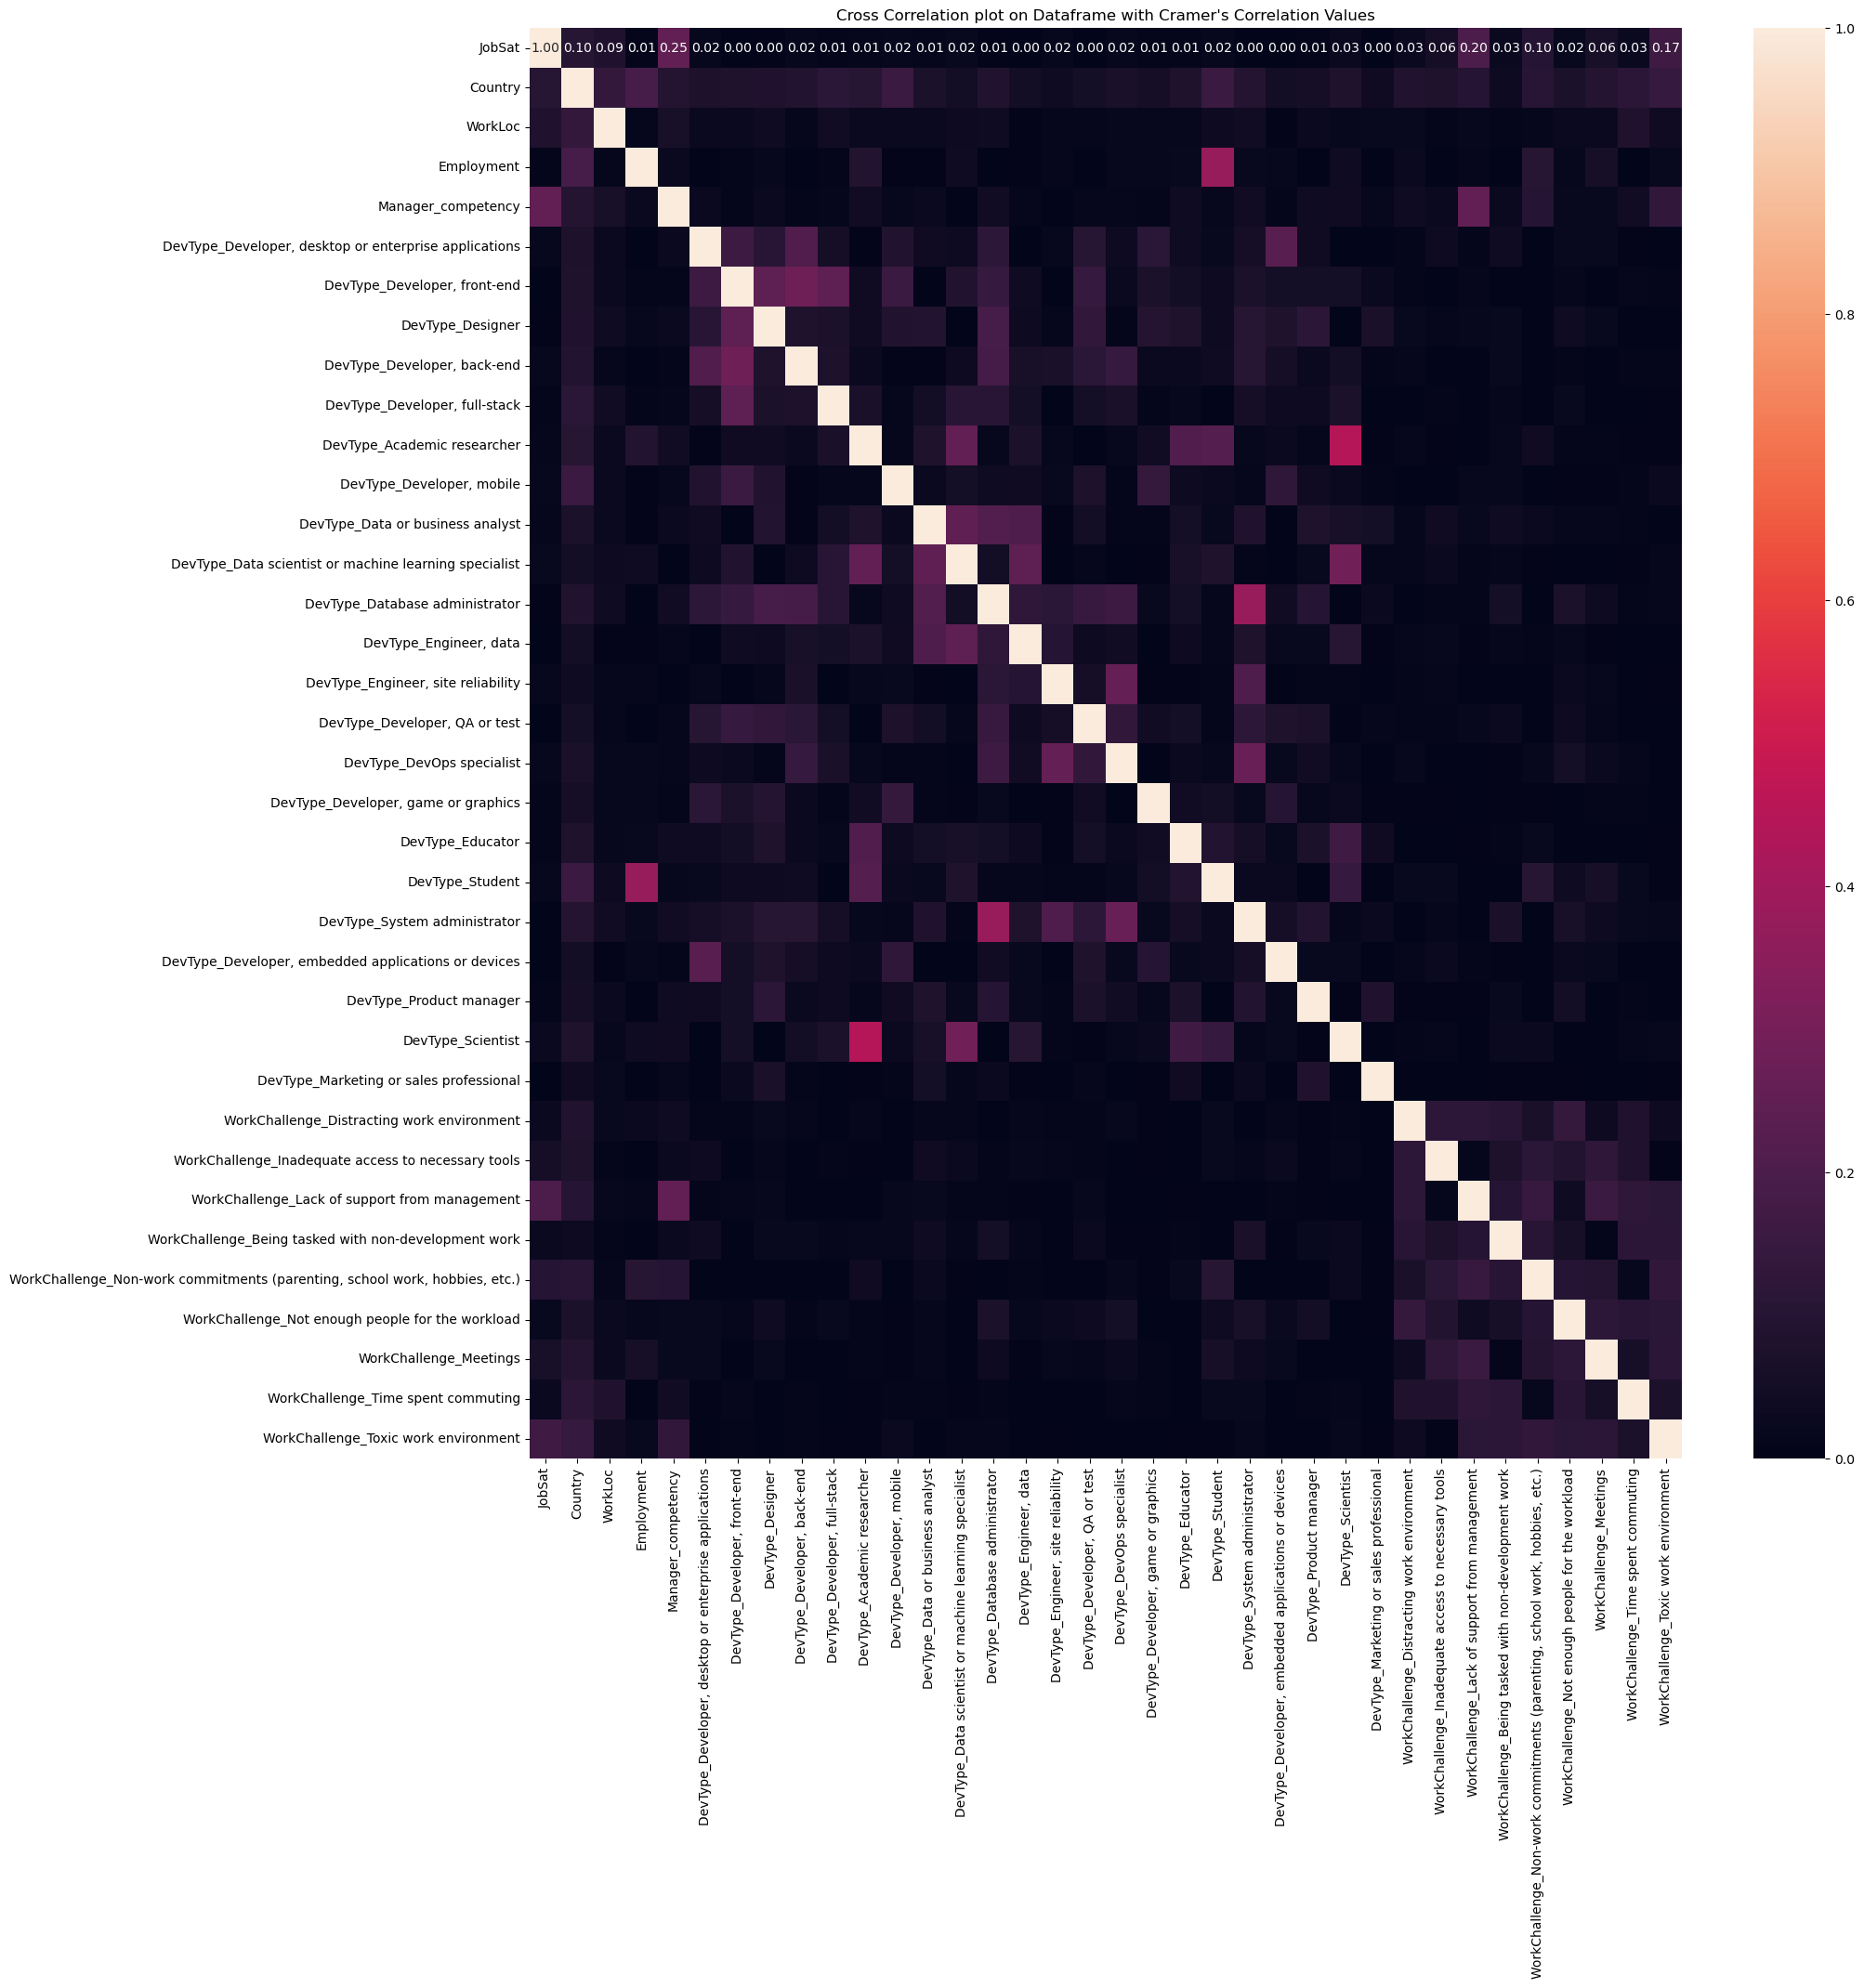

In [15]:
from scipy.stats import chi2_contingency

def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v
def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(20,20))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()
       
plot_cramer(df)


This gives an overview of all correlations, but is hard to read. It would be a great method for seeking correlations between categorical variables only and also perhaps to a smaller amount of them. 
___
To do a better correlation analysis, we will add in numerical variables as well, and narrow down the focus to correlations between JobSat and the rest.
* For Categorical vs. Categorical we will continue using Cramer's V,
* For Categorical vs. Numerical we will apply Spearman's rank correlation coefficient. Spearman's correlation assesses how well the relationship between two variables can be described using a monotonic function, suitable for ordinal data.
___

In [16]:
df_19_clean = df

In [17]:
from scipy.stats import chi2_contingency, spearmanr
import warnings

def cramerV(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def compare_with_jobsat(df, jobsat_col):
    correlations = {}
    for col in df.columns:
        if col == jobsat_col:
            continue
        if df[col].dtype == 'O':  # Categorical
            correlations[col] = cramerV(df[jobsat_col], df[col])
        else:  # Numerical
            # Encoding 'JobSat' as ordinal if not already
            if df[jobsat_col].dtype == 'O':
                df_temp = df.copy()
                df_temp[jobsat_col] = df_temp[jobsat_col].astype('category').cat.codes
                correlations[col] = spearmanr(df_temp[jobsat_col], df_temp[col].fillna(df_temp[col].median()))[0]
            else:
                correlations[col] = spearmanr(df[jobsat_col], df[col].fillna(df[col].median()))[0]
    return correlations

# Replace 'JobSat' with your actual Job Satisfaction column name
correlations_with_jobsat = compare_with_jobsat(df, 'JobSat')

# Printing correlations
print("Correlations with JobSat:")
for col, corr in correlations_with_jobsat.items():
    print(f'{col}: {corr}')


Correlations with JobSat:
Country: 0.10384400491931911
WorkLoc: 0.08514305911135384
Employment: 0.008618425340418312
Manager_competency: 0.2533272450137948
DevType_Developer, desktop or enterprise applications: 0.018588946029168267
DevType_Developer, front-end: 0.0
DevType_Designer: 0.004798534800002254
DevType_Developer, back-end: 0.017303205633965504
DevType_Developer, full-stack: 0.00961498620118171
DevType_Academic researcher: 0.014012902045873759
DevType_Developer, mobile: 0.0191232995057249
DevType_Data or business analyst: 0.014847946648272171
DevType_Data scientist or machine learning specialist: 0.021840292303492003
DevType_Database administrator: 0.0074934959876336105
DevType_Engineer, data: 0.0
DevType_Engineer, site reliability: 0.017808875873015835
DevType_Developer, QA or test: 0.0
DevType_DevOps specialist: 0.01845970516194397
DevType_Developer, game or graphics: 0.008398724557359228
DevType_Educator: 0.010003966078920531
DevType_Student: 0.01856479223515944
DevType_Syst

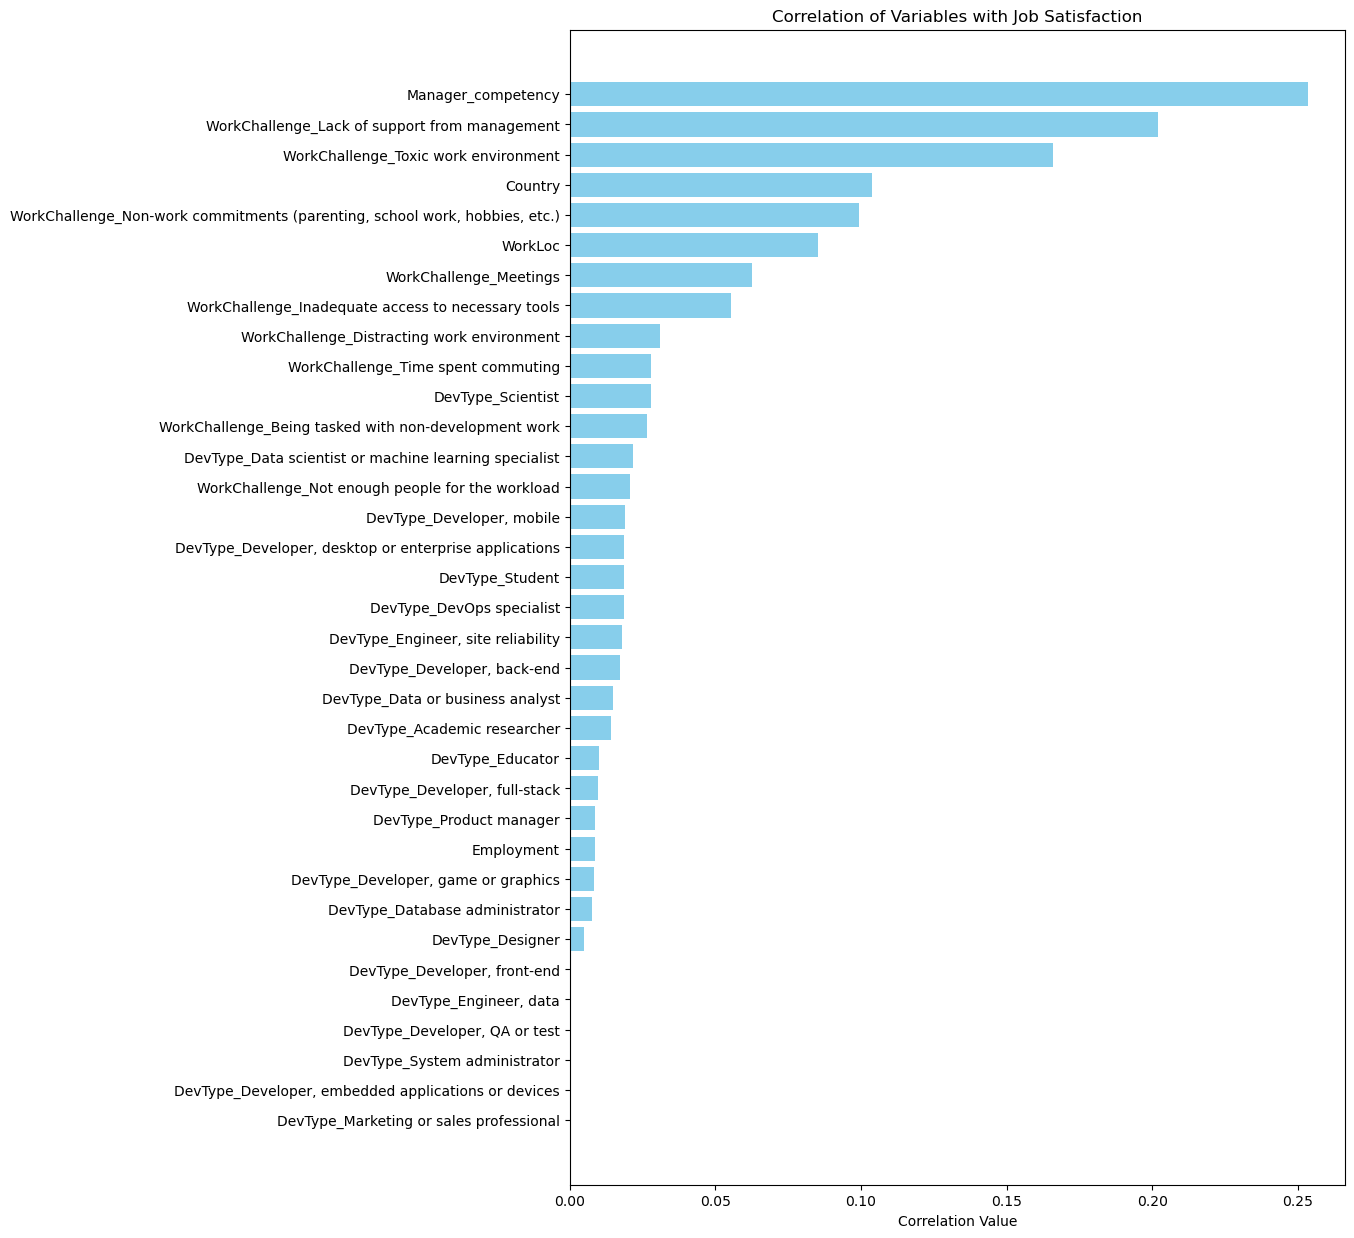

In [18]:
# using bar-chart to visualize results of correlations with JobSat column

import matplotlib.pyplot as plt

# Sorting the dictionary by values in descending order
sorted_correlations = {k: v for k, v in sorted(correlations_with_jobsat.items(), key=lambda item: item[1], reverse=True)}

names = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

plt.figure(figsize=(10, 15))
plt.barh(names, values, color='skyblue')
plt.xlabel('Correlation Value')
plt.title('Correlation of Variables with Job Satisfaction')
plt.axvline(x=0, color='grey', lw=1.3)
plt.gca().invert_yaxis()  # This inverts the y-axis to match the descending order of values
plt.show()

___
**Conclusions:**

* Manager_competency: This has the longest bar, suggesting it's the most strongly correlated variable with job satisfaction, indicating that a manager's competency may greatly affect an employee's job satisfaction.

* WorkChallenge variables: Several "WorkChallenge_" prefixed variables (like lack of support from management, toxic work environment, non-work commitments) are among the top correlating factors, suggesting that the conditions and challenges of one’s work environment have a significant impact on job satisfaction.

* Country: It's notable that 'Country' shows up relatively high on the list, which could mean that job satisfaction varies significantly from country to country as well as the term 'job satisfaction' itself might have different tolerances, based on cultural customs. 

* WorkLoc: The physical location of where one works (e.g., home, office) also has a noticeable correlation, though it's not as strong as managerial competence or work challenges.

* DevType variables: Different developer roles (such as data scientist, mobile developer, full-stack developer) have varying correlations with job satisfaction, hinting that job satisfaction may depend significantly on the specific role or field one is working in within the tech industry, but none are significantly strong. 

**Implications:**

* Overall, managerial competence and workplace challenges seem to be very influential in an employee's job satisfaction, which could be valuable information for organizational focus. The roles and specializations also play a role but to a lesser extent, and the impact of challenges outside of work and work location also contribute to overall job satisfaction.

* **None of the correlations are strong enough to study further, mainly due to weak correlation scores and lack of these variables in other surveys.**
___

Since management has a high impact on JobSat, we're going to dig a little deeper into it.

1. Load in  data again
2. Filter for 'JobSat', 'Manager_competency'
3. Vizualize and analyze the results

In [20]:
# Path to the directory containing the CSV files
csv_directory = r'C:\Users\rdobe\OneDrive\Documents\Stack Overflow'

# Dictionary to store DataFrames
dataframes = {}

# List all CSV files in the directory
csv_files = os.listdir(csv_directory)

# Iterate through each CSV file and load into a DataFrame
for csv_file in csv_files:
    # Check if the file is a CSV file
    if csv_file.endswith('.csv'):
        # Construct the full path to the CSV file
        csv_path = os.path.join(csv_directory, csv_file)
        
        # Load CSV into DataFrame
        df = pd.read_csv(csv_path)
        
        # Store DataFrame in the dictionary with filename as key
        dataframes[csv_file] = df

In [21]:
filename_to_access = 'survey_results_public_2019.csv'

if filename_to_access in dataframes:
    df_19 = dataframes[filename_to_access]

In [22]:
df_19 = df_19.rename(columns={'MgrIdiot': 'Manager_competency'})
df_19_jobsat_manager = df_19[['JobSat', 'Manager_competency']].dropna()
df_19_jobsat_manager

,JobSat,Manager_competency
2,Slightly satisfied,Not at all confident
3,Slightly satisfied,Very confident
4,Slightly dissatisfied,Somewhat confident
5,Slightly satisfied,Very confident
8,Slightly satisfied,Somewhat confident
...,...,...
88325,Very satisfied,Very confident
88326,Neither satisfied nor dissatisfied,Not at all confident
88328,Neither satisfied nor dissatisfied,Very confident
88329,Very dissatisfied,Not at all confident


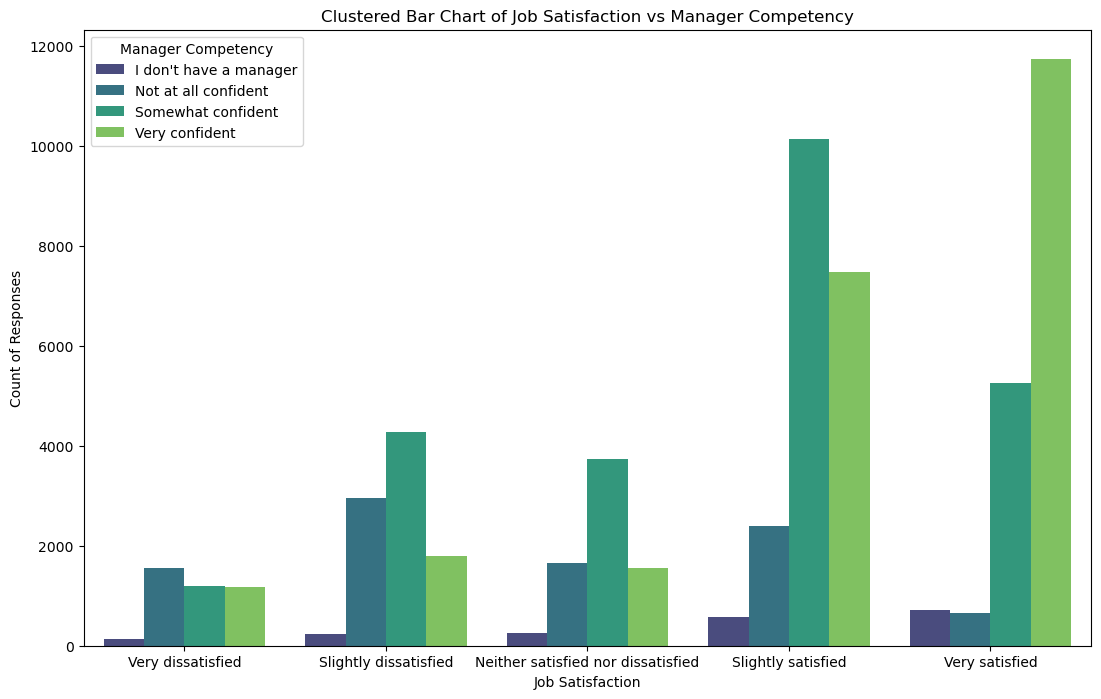

In [23]:
# For the clustered bar chart, we don't normalize the crosstab, because we want to see the counts
cross_tab = pd.crosstab(df_19_jobsat_manager['JobSat'], df_19_jobsat_manager['Manager_competency'])

# Plotting the clustered bar chart
plt.figure(figsize=(13, 8))

# Defining the order
order = [
    'Very dissatisfied', 
    'Slightly dissatisfied', 
    'Neither satisfied nor dissatisfied', 
    'Slightly satisfied', 
    'Very satisfied'
]

# We'll use the barplot function from seaborn to create a clustered bar chart
clustered_bar = sns.barplot(
    data=cross_tab.reset_index().melt(id_vars='JobSat'),
    x='JobSat', 
    y='value', 
    hue='Manager_competency',
    palette='viridis',
    order=order
)

plt.title('Clustered Bar Chart of Job Satisfaction vs Manager Competency')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count of Responses')
plt.legend(title='Manager Competency')

# Display the plot
plt.show()


___
**Conclusions:**

* Let's start with the obvious - the category “Very satisfied” has the highest count for “Very confident” and second highest for “Somewhat confident” in manager competency, suggesting a positive association between higher confidence in management and greater job satisfaction.

* Similar trend but switched positions also manifests in 'Slightly satisfied category, again suggesting a positive association between higher confidence in management and greater job satisfaction

* The “Not at all confident” response seems to be relatively evenly distributed across all levels of job satisfaction, with a slight increase for those who are “dissatisfied”. This could imply that lack of confidence in a manager might contribute to job dissatisfaction.

* “Very dissatisfied” individuals have the lowest counts across all levels of manager competency, which could suggest that this is the least common state or that the data set has fewer individuals who are very dissatisfied with their job and of course for those that are very dissatisfied confidence in management is weak. 

The general trend indicates that higher job satisfaction correlates with higher confidence in manager competency.
___

**Final conclusions:**

* There's insufficient data to properly see job satisfaction over 5 years (which the goal of this analysis), because 'Job satisfation' as category disappears from 2021 survey and onwards.
  
* JobSat can also not be studied based on other correlations in the survey due to insufficient data on working conditions and management evaluation from respondents in other surveys.

* We touched on this already, but I want to reinforce that job satisfaction might have far more cultural implications than one might think. So this could be studied per country.
  
* Surprisingly weak correlations are for Working hours and Work location. 


**Other analysis ideas if time wasn't a constraint:**

* JobSat and Countries
* JobSat and Overtime